In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def opticalFlow(referenceFrameSec):
    cap = cv2.VideoCapture("video.mp4")
    ret, first_frame = cap.read()
    prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
    mask = np.zeros_like(first_frame)
    mask[..., 1] = 255
    i=1
    while(cap.isOpened()):
        ret, frame = cap.read()
        cv2.imshow("Input Window", frame)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray,None,0.5, 3, 15, 3, 5, 1.2, 0)
        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        mask[..., 0] = angle * 180 / np.pi / 2
        mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
        rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
        cv2.imshow("dense optical flow", rgb)
        if (referenceFrameSec == 1):
            prev_gray = gray
        elif (referenceFrameSec != 1):
            if i%referenceFrameSec == 0:
                prev_gray = gray    
        if(i%30 ==0 ):
            plt.axis('off')
            plt.imshow(rgb,cmap='gray', vmin=0, vmax=255)
            plt.show()
                
        i=i+1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    



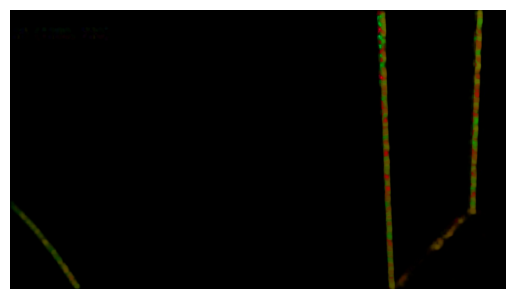

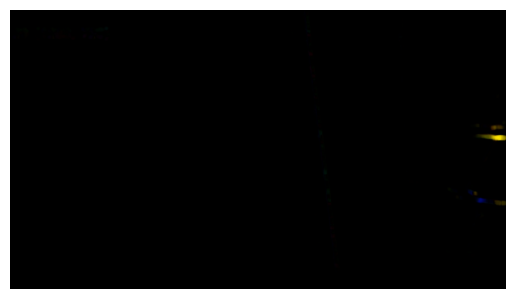

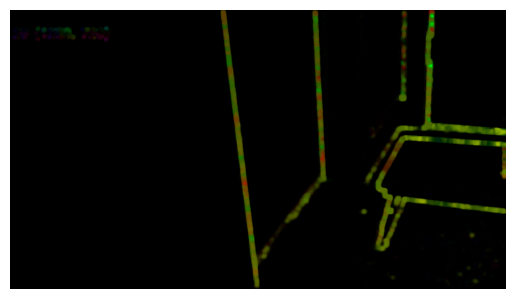

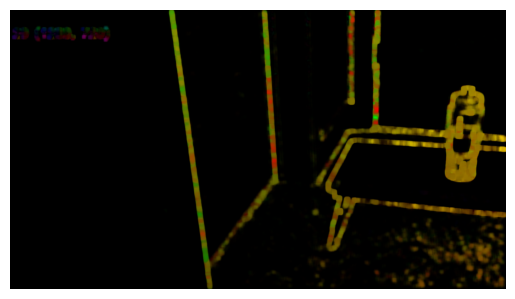

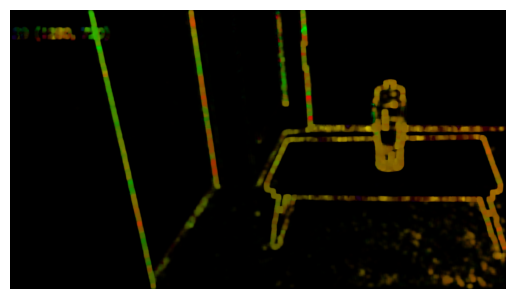

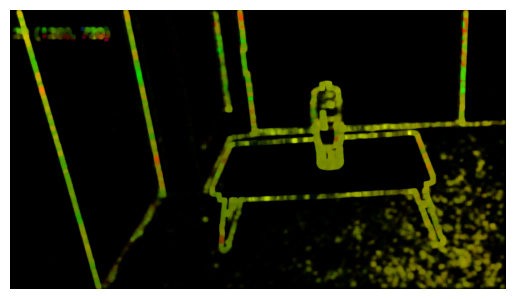

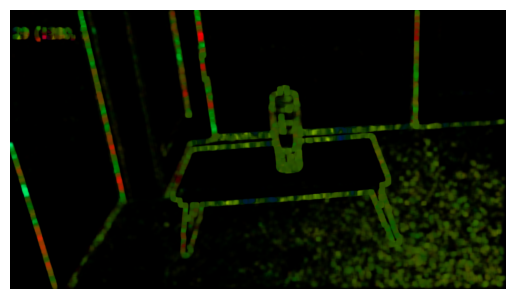

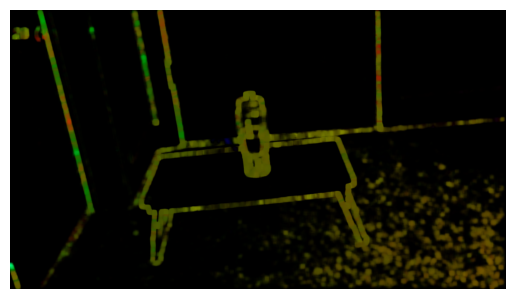

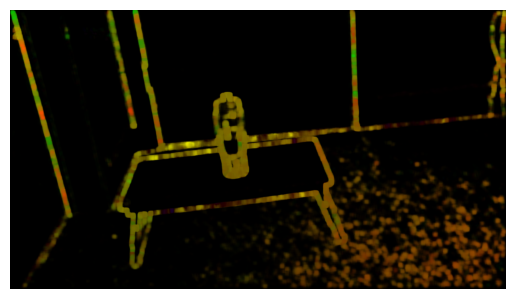

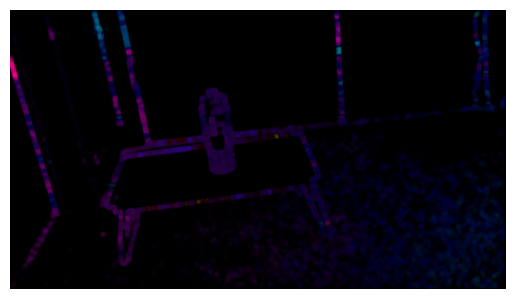

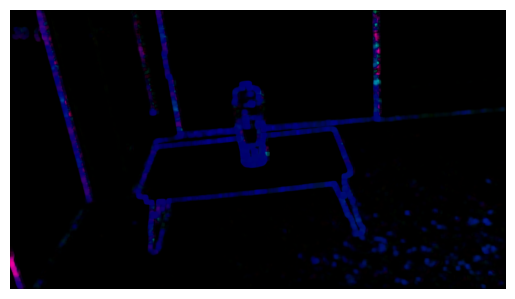

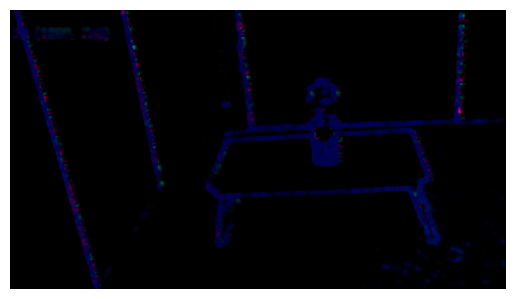

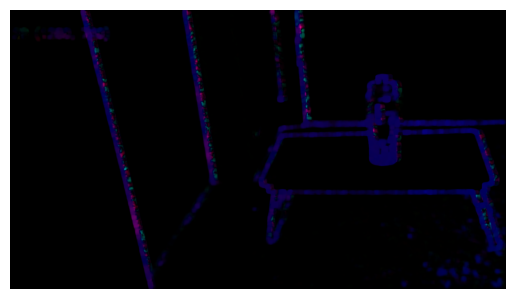

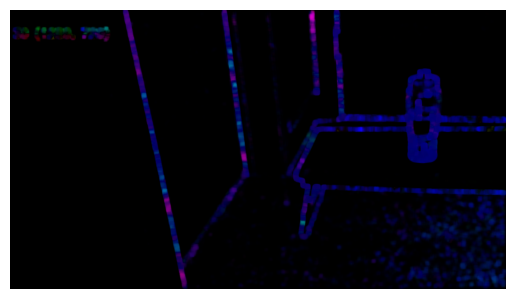

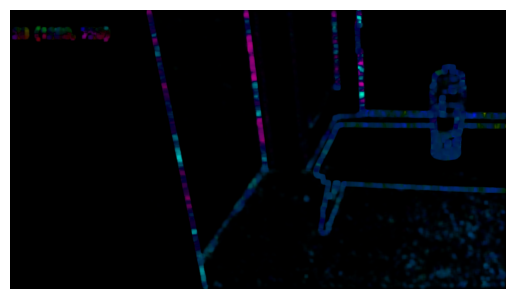

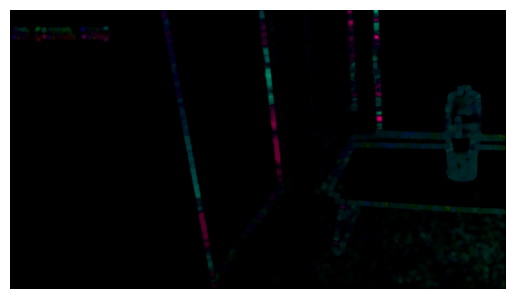

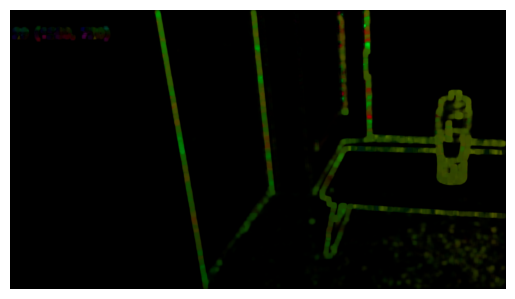

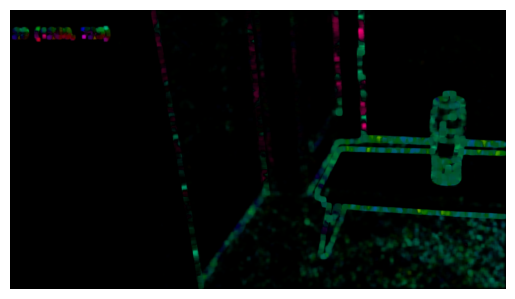

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [2]:
opticalFlow(1)

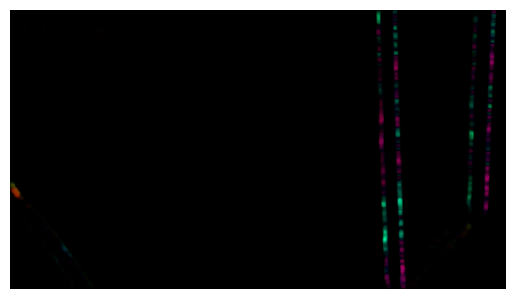

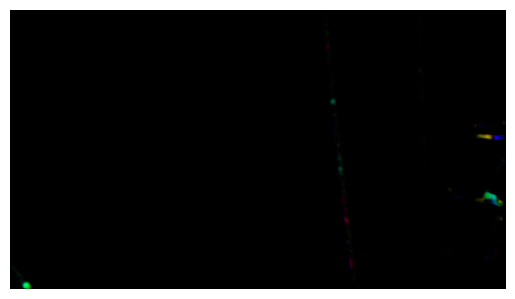

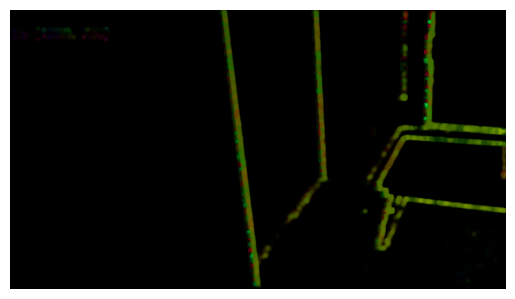

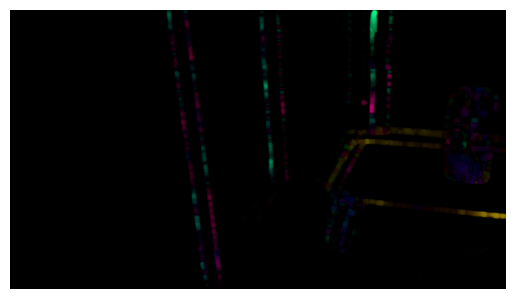

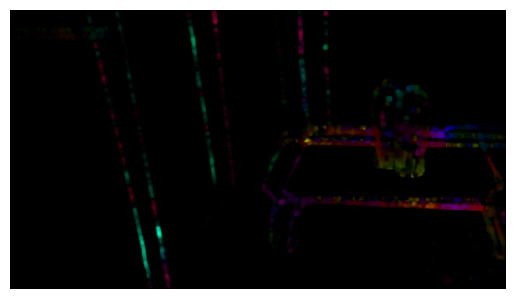

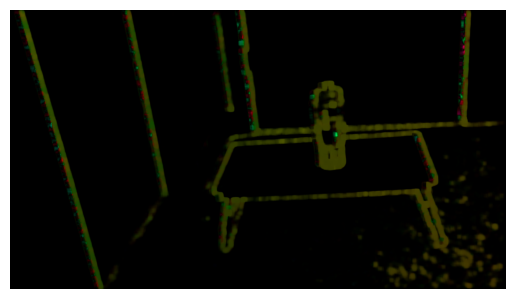

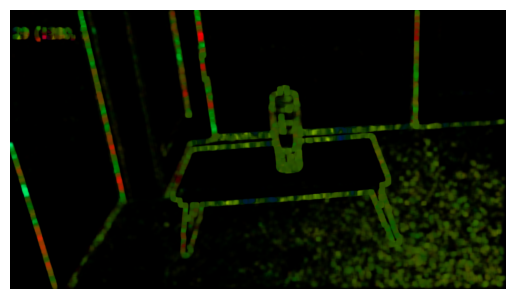

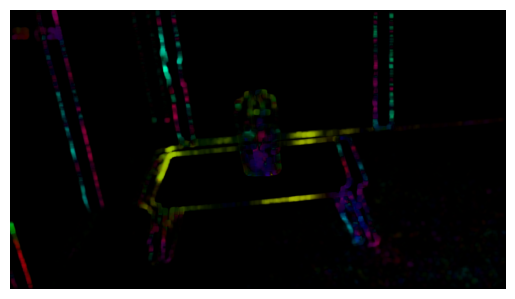

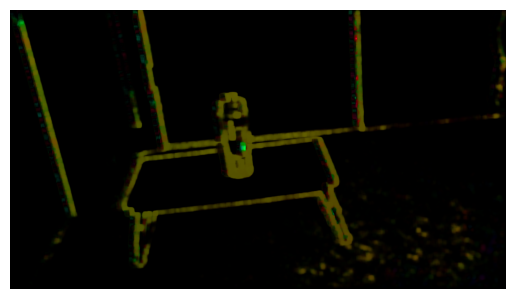

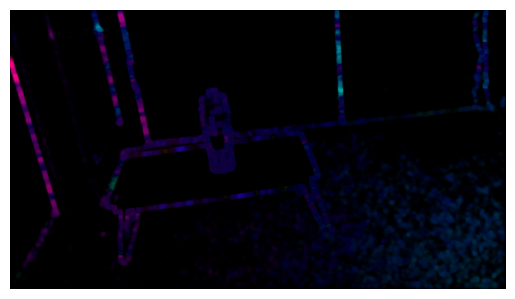

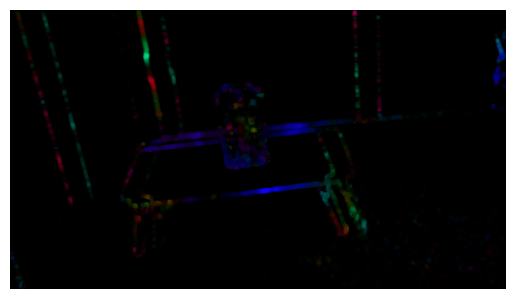

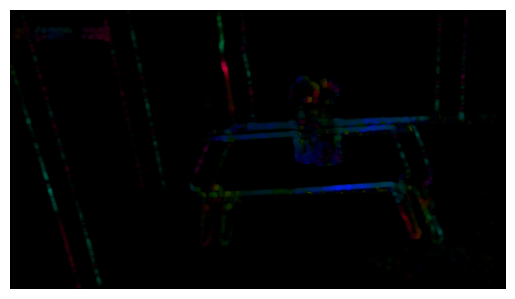

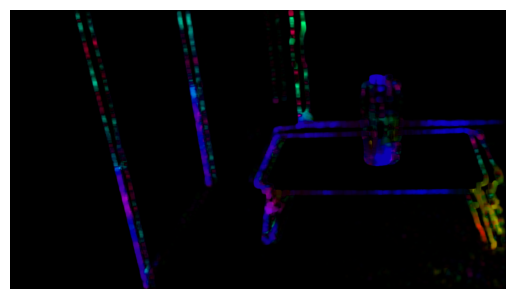

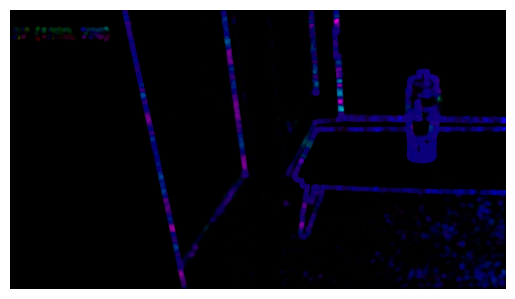

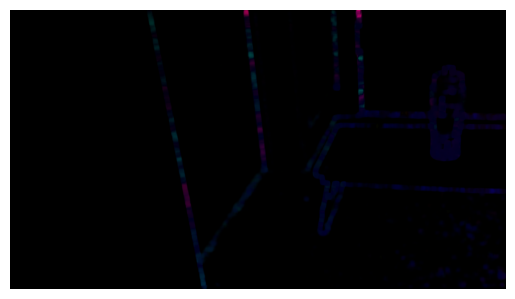

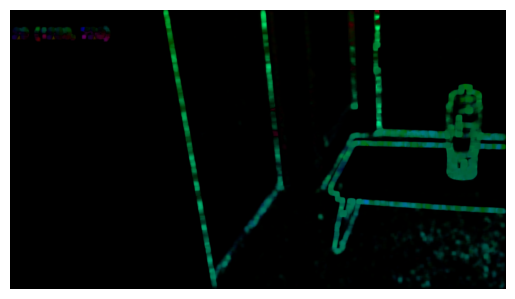

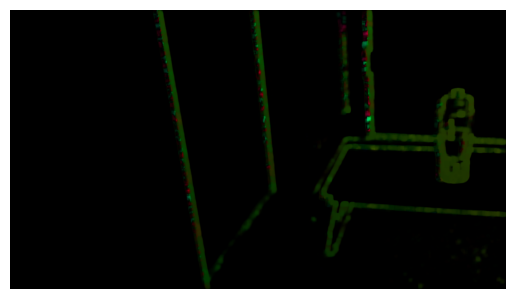

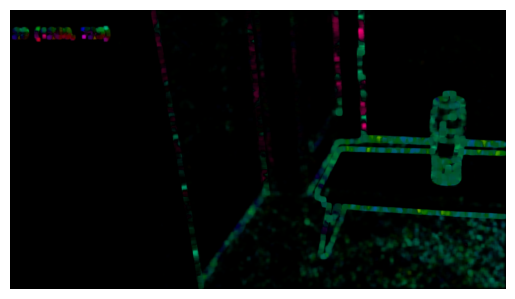

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [3]:
opticalFlow(11)


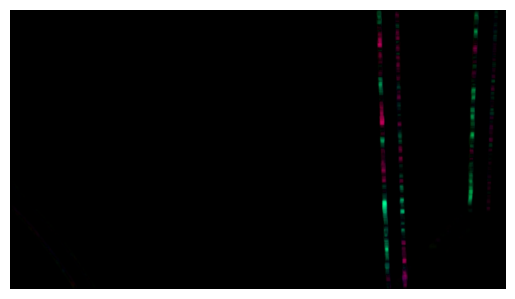

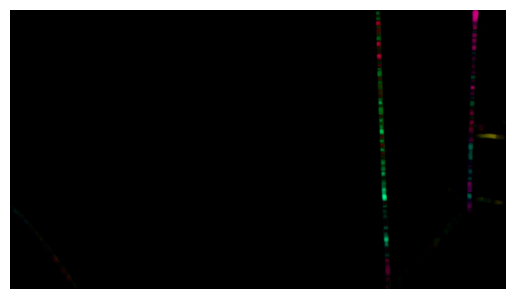

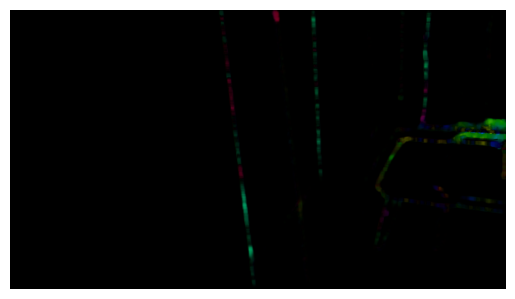

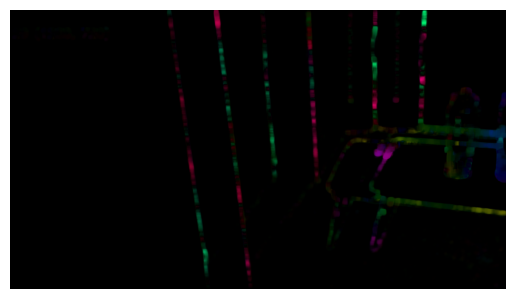

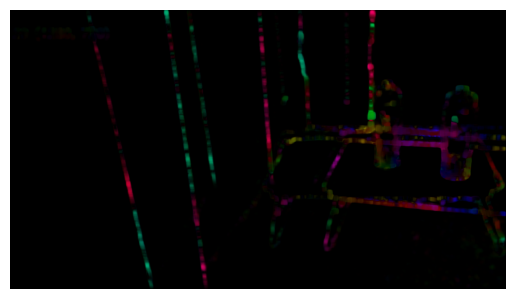

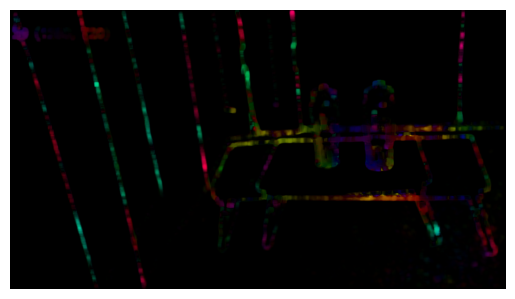

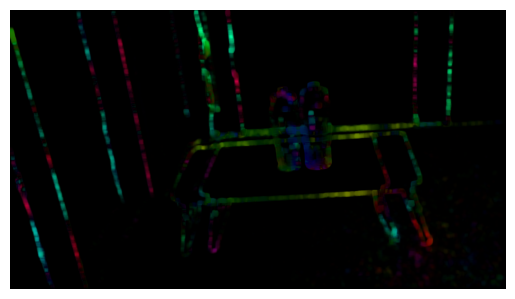

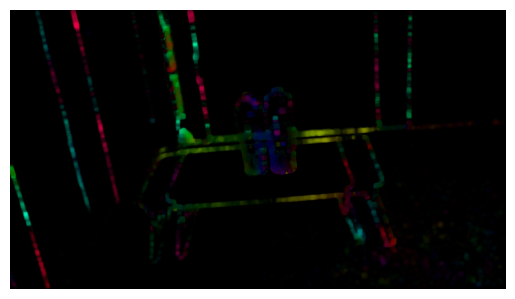

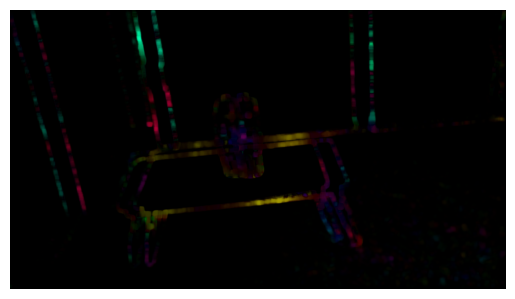

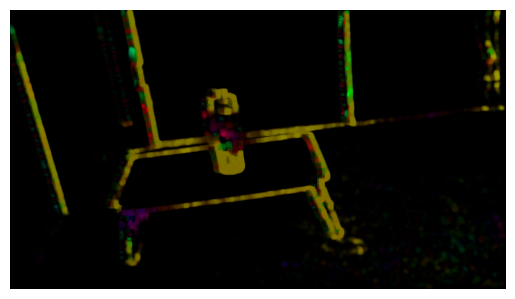

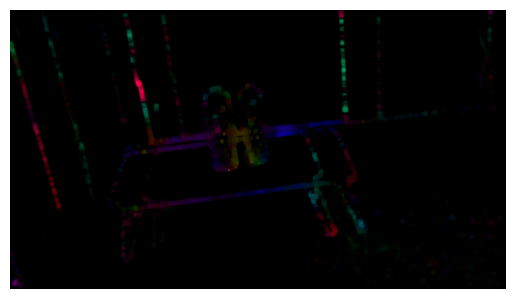

In [4]:
opticalFlow(31)